In [ ]:
pip install -r Packages.txt

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score

In [3]:
file_path_preprocess = r'D:\Alzheimer_s dataset\brain\TMTpreprocessed_data.xlsx'
original_data = pd.read_excel(file_path_preprocess)
data = original_data.copy()    #copying the data to maintain the originalilty of the data
print(data.shape) #Dimension of the data
data.head()

(118, 3701)


,Unnamed: 0,Q03001,Q9UPA5,Q09666,Q9Y4G6,O15020,Q02952,Q9Y490,Q12955,P35579,...,P06703,P30536,P56277,age,sex,pmi,disease_group,batch,study,batch_org
0,Banner.b01.127C,0.793794,0.797887,0.808218,0.796770,0.791914,0.816653,0.724105,0.758086,0.798568,...,0.435895,0.331287,0.280285,86,0,2.50,AD,1,Banner,1
1,Banner.b01.129C,0.806849,0.798639,0.838980,0.807406,0.800303,0.834854,0.733493,0.755572,0.802688,...,0.416044,0.365588,0.311146,81,1,2.83,AD,1,Banner,1
2,Banner.b01.129N,0.804411,0.810861,0.825216,0.812318,0.800979,0.824337,0.727744,0.763743,0.800215,...,0.395066,0.336315,0.308950,75,0,2.75,Control,1,Banner,1
3,Banner.b01.130C,0.797387,0.800212,0.811385,0.807874,0.798513,0.821305,0.725272,0.763010,0.799233,...,0.400856,0.342176,0.296247,81,0,4.00,AD,1,Banner,1
4,Banner.b02.127C,0.811064,0.800206,0.853693,0.805791,0.799589,0.829412,0.746777,0.761575,0.803144,...,0.487932,0.400886,0.241778,74,0,3.00,AD,1,Banner,2


Distribution of Dataset

disease_group
AD         92
Control    26
Name: count, dtype: int64


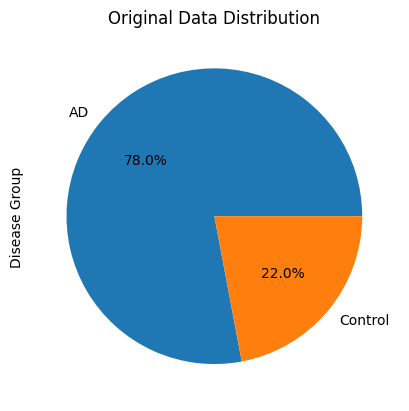

In [4]:
#features of the data
x = data.iloc[:, 1:-7]       #all the intensity values of sample with respect to the proteins

#target of the data
y = data['disease_group']   #binary data (AD/control)

print(y.value_counts())

ax = y.value_counts().plot.pie(autopct='%1.1f%%')
title = ax.set_title("Original Data Distribution")
ylabel = ax.set_ylabel("Disease Group")

Balancing the dataset

Oversampling the minority data using SMOTE

c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Sunda

disease_group
AD         92
Control    92
Name: count, dtype: int64


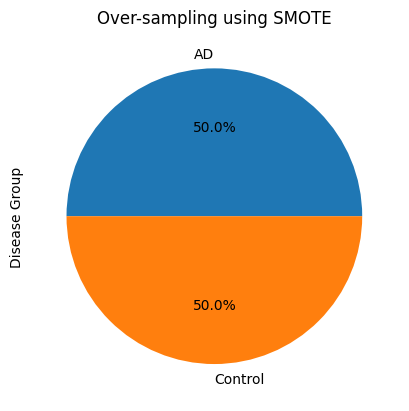

In [5]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct='%1.1f%%')
title = ax.set_title("Over-sampling using SMOTE")
ylabel = ax.set_ylabel("Disease Group")
print(y_res.value_counts())

Undersampling the majority data

disease_group
AD         26
Control    26
Name: count, dtype: int64


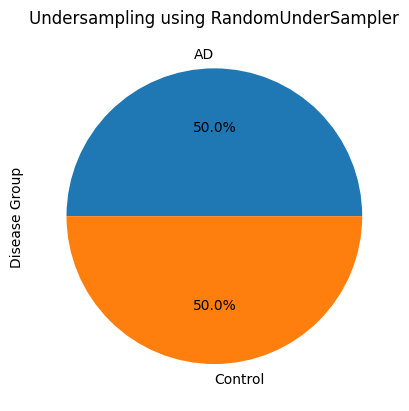

In [14]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x,y)

ax = y_rus.value_counts().plot.pie(autopct='%1.1f%%')
title = ax.set_title("Undersampling using RandomUnderSampler")
ylabel = ax.set_ylabel("Disease Group")
print(y_rus.value_counts())


Model performance after data balancing using oversampling (SMOTE)

In [6]:
#Logistic regression model
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42) #splitting the data into training and testing data
model = LogisticRegression()
model.fit(x_train, y_train) #fitting the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("LogisticRegression Model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(y_pred)

#Decision Tree model
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Decisiontree Model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(y_pred)

#Random Forest model
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Random forest Model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(y_pred)

c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Model
Accuracy: 0.7837837837837838
Confusion Matrix:
[[16  3]
 [ 5 13]]
Classification Report:
              precision    recall  f1-score   support

          AD       0.76      0.84      0.80        19
     Control       0.81      0.72      0.76        18

    accuracy                           0.78        37
   macro avg       0.79      0.78      0.78        37
weighted avg       0.79      0.78      0.78        37

['AD' 'AD' 'Control' 'AD' 'Control' 'Control' 'AD' 'AD' 'AD' 'AD' 'AD'
 'AD' 'AD' 'Control' 'AD' 'Control' 'Control' 'AD' 'AD' 'AD' 'Control'
 'Control' 'Control' 'AD' 'AD' 'Control' 'AD' 'AD' 'Control' 'AD' 'AD'
 'Control' 'Control' 'Control' 'AD' 'Control' 'Control']
Decisiontree Model
Accuracy: 0.918918918918919
Confusion Matrix:
[[18  1]
 [ 2 16]]
Classification Report:
              precision    recall  f1-score   support

          AD       0.90      0.95      0.92        19
     Control       0.94      0.89      0.91        18

    accuracy      

Model performance after data balancing using undersampling

In [19]:
#Logistic regression model
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42) #splitting the data into training and testing data
model = LogisticRegression()
model.fit(x_train, y_train) #fitting the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("LogisticRegression Model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(y_pred)

#Decision Tree model
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Decisiontree Model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(y_pred)

#Random Forest model
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Random forest Model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(y_pred)

c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Model
Accuracy: 0.7272727272727273
Confusion Matrix:
[[4 2]
 [1 4]]
Classification Report:
              precision    recall  f1-score   support

          AD       0.80      0.67      0.73         6
     Control       0.67      0.80      0.73         5

    accuracy                           0.73        11
   macro avg       0.73      0.73      0.73        11
weighted avg       0.74      0.73      0.73        11

['AD' 'Control' 'Control' 'Control' 'Control' 'AD' 'AD' 'Control' 'AD'
 'AD' 'Control']
Decisiontree Model
Accuracy: 0.9090909090909091
Confusion Matrix:
[[5 1]
 [0 5]]
Classification Report:
              precision    recall  f1-score   support

          AD       1.00      0.83      0.91         6
     Control       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11

['AD' 'Control' 'Control' 'Control' 'Control

Model performance before data balancing

In [16]:
#Logistic regression model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #splitting the data into training and testing data
model = LogisticRegression()
model.fit(x_train, y_train) #fitting the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("LogisticRegression Model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(y_pred)

#Decision Tree model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Decisiontree Model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(y_pred)

#Random Forest model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Random forest Model")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(y_pred)

c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

LogisticRegression Model
Accuracy: 0.8333333333333334
Confusion Matrix:
[[20  0]
 [ 4  0]]
Classification Report:
              precision    recall  f1-score   support

          AD       0.83      1.00      0.91        20
     Control       0.00      0.00      0.00         4

    accuracy                           0.83        24
   macro avg       0.42      0.50      0.45        24
weighted avg       0.69      0.83      0.76        24

['AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD'
 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD']
Decisiontree Model
Accuracy: 0.9166666666666666
Confusion Matrix:
[[19  1]
 [ 1  3]]
Classification Report:
              precision    recall  f1-score   support

          AD       0.95      0.95      0.95        20
     Control       0.75      0.75      0.75         4

    accuracy                           0.92        24
   macro avg       0.85      0.85      0.85        24
weighted avg       0.92      0.92      0.92        24

[

c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sundar Kannan\miniconda3\envs\alzheimers\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr